<a href="https://colab.research.google.com/github/Simarjit1303/Python-for-data-science-/blob/main/Python_Pandas_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Reading

In [72]:
df = pd.read_csv('/content/sample_data/bank_data_with_NaN.csv')
print(df.shape)
df.head(5)

(10000, 13)


,id,last_name,credit_score,country,gender,age,years_customer,balance_euros,num_products,has_credit_card,is_active,salary_euros,retained
0,15634602.0,Hargrave,619.0,Switzerland,f,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,0.0
1,15647311.0,Hill,608.0,Austria,f,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,1.0
2,15619304.0,Onio,502.0,Switzerland,f,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,0.0
3,15701354.0,Boni,699.0,Switzerland,f,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,1.0
4,15737888.0,Mitchell,850.0,Austria,f,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,1.0


# Data Cleaning

In [73]:
df.isnull().sum()

,0
id,102
last_name,76
credit_score,69
country,80
gender,73
age,79
years_customer,85
balance_euros,77
num_products,64
has_credit_card,73


In [74]:
# Fill missing values in 'balance_euros' with 0
df['balance_euros'] = df['balance_euros'].fillna(0.00)

# Fill missing values in 'credit_score' with the mean
df['credit_score'] = df['credit_score'].fillna(df['credit_score'].mean())

# Fill missing values in 'age' with the median
df['age'] = df['age'].fillna(df['age'].mean())

# Fill missing values in 'salary_euros' with the mean
df['salary_euros'] = df['salary_euros'].fillna(df['salary_euros'].mean())

# Fill missing values in 'gender' with random values
df['gender'] = df['gender'].apply(lambda x: x if pd.notna(x) else np.random.choice(['m', 'f']))

# Fill missing values in 'years_customer' with random values between 1 and 10
df['years_customer'] = df['years_customer'].apply(lambda x: x if pd.notna(x) else np.random.randint(1, 11))

# Fill missing values in 'num_products' with random values between 1 and 4
df['num_products'] = df['num_products'].apply(lambda x: x if pd.notna(x) else np.random.randint(1, 5))

# Fill missing values in 'has_credit_card' with random values (0 or 1)
df['has_credit_card'] = df['has_credit_card'].apply(lambda x: x if pd.notna(x) else np.random.randint(0, 2))

# Fill missing values in 'is_active' with random values (0 or 1)
df['is_active'] = df['is_active'].apply(lambda x: x if pd.notna(x) else np.random.randint(0, 2))

# Fill missing values in 'retained' with the mode
df['retained'] = df['retained'].apply(lambda x: x if pd.notna(x) else np.random.randint(0, 2))

# Fill missing values in 'country' with the mode
df['country'] = df['country'].fillna(df['country'].mode()[0])

# Fill missing values in 'last_name' with 'Unknown'
df['last_name'] = df['last_name'].fillna('Unknown')

# Fill missing values in 'id' with a unique identifier (e.g., sequential numbers)
# df['id'] = df['id'].fillna(pd.Series(range(1, len(df) + 1)))

df.isna().sum()

,0
id,102
last_name,0
credit_score,0
country,0
gender,0
age,0
years_customer,0
balance_euros,0
num_products,0
has_credit_card,0


<Axes: xlabel='gender', ylabel='retained'>

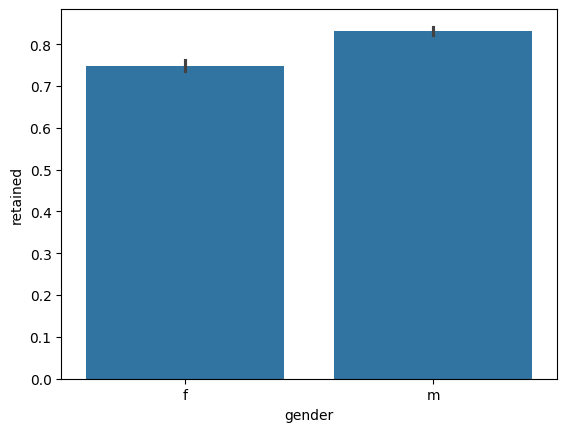

In [81]:
sns.barplot(data=df, x='gender', y='retained')

In [82]:
fig = px.pie(df, names='country', title='cutomer distribution by country')
fig.show()

In [100]:
fig = px.scatter_3d(df, x='salary_euros', y='age', z='credit_score',
              color='age')
fig.show()

In [105]:
fig = px.line_3d(df, x='retained', y='age', z='gender',
              color='country')
fig.show()

<Axes: >

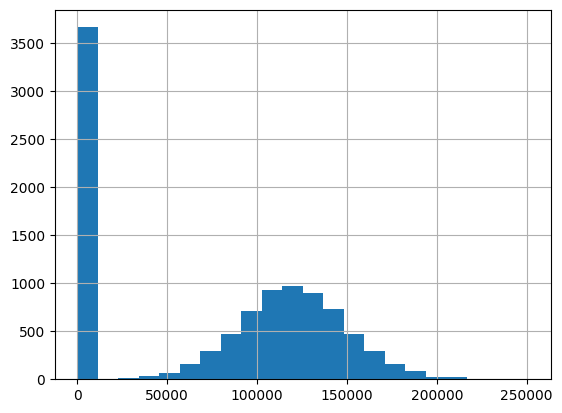

In [93]:
df["balance_euros"].hist(bins="auto")

array([[<Axes: title={'center': 'credit_score'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'years_customer'}>],
       [<Axes: title={'center': 'salary_euros'}>,
        <Axes: title={'center': 'balance_euros'}>,
        <Axes: title={'center': 'num_products'}>]], dtype=object)

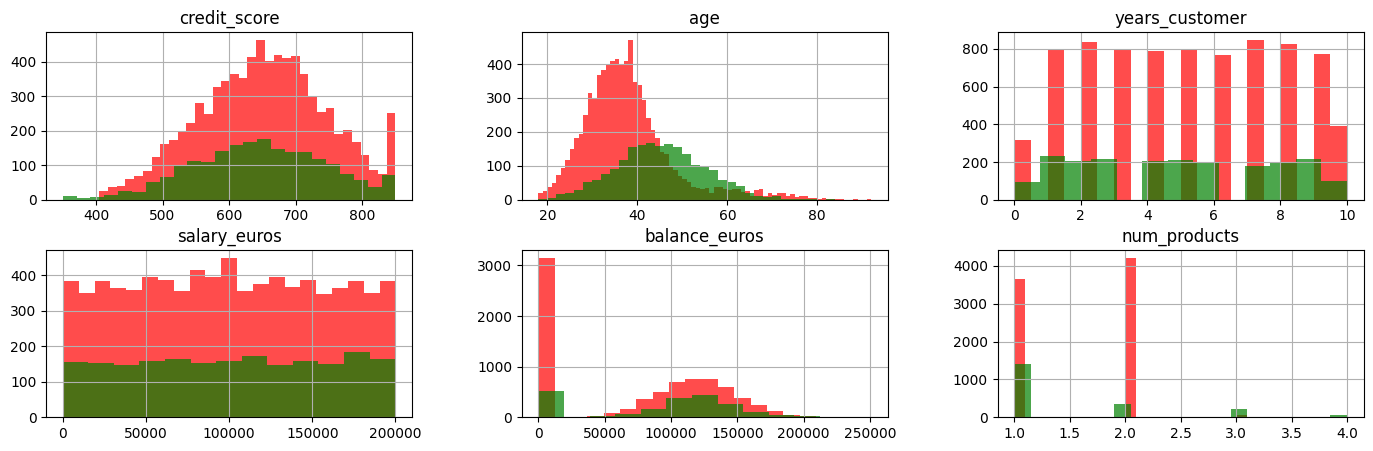

In [134]:
fig,ax = plt.subplots(2,3,figsize=(17,5))
df[df['retained']==1][['credit_score','age','years_customer','salary_euros','balance_euros','num_products']].hist(bins='auto',color='red', alpha=0.7,ax=ax)
df[df['retained']==0][['credit_score','age','years_customer','salary_euros','balance_euros','num_products']].hist(bins='auto',color='green', alpha=0.7,ax=ax)

# Correlation Analysis

In [136]:
tmp = pd.DataFrame()

tmp['col1'] = [3,5,7,11,23]
tmp['col2'] = [9,15,21,33,69]
tmp

,col1,col2
0,3,9
1,5,15
2,7,21
3,11,33
4,23,69


In [137]:
tmp.corr()

,col1,col2
col1,1.0,1.0
col2,1.0,1.0


In [139]:
df[['credit_score','age','years_customer','salary_euros','balance_euros','num_products','has_credit_card','is_active','retained']].corr()

,credit_score,age,years_customer,salary_euros,balance_euros,num_products,has_credit_card,is_active,retained
credit_score,1.000000,-0.003803,0.000211,-0.001318,0.005817,0.011313,-0.006443,0.025658,0.028746
age,-0.003803,1.000000,-0.009365,-0.007013,0.027452,-0.028378,-0.009371,0.083274,-0.285371
years_customer,0.000211,-0.009365,1.000000,0.008910,-0.011890,0.012655,0.022069,-0.025176,0.013525
salary_euros,-0.001318,-0.007013,0.008910,1.000000,0.016590,0.013598,-0.006788,-0.010595,-0.010679
balance_euros,0.005817,0.027452,-0.011890,0.016590,1.000000,-0.293659,-0.016145,-0.009552,-0.116577
num_products,0.011313,-0.028378,0.012655,0.013598,-0.293659,1.000000,0.003277,0.007381,0.046995
has_credit_card,-0.006443,-0.009371,0.022069,-0.006788,-0.016145,0.003277,1.000000,-0.013282,0.004575
is_active,0.025658,0.083274,-0.025176,-0.010595,-0.009552,0.007381,-0.013282,1.000000,0.154394
retained,0.028746,-0.285371,0.013525,-0.010679,-0.116577,0.046995,0.004575,0.154394,1.000000
